<a href="https://colab.research.google.com/github/joseogg/weibull-distribution/blob/main/Weibull_and_time_series_forescasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power


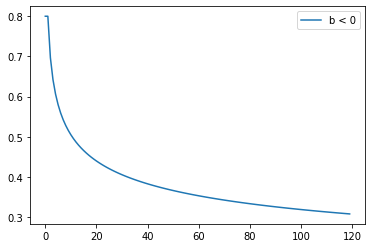

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


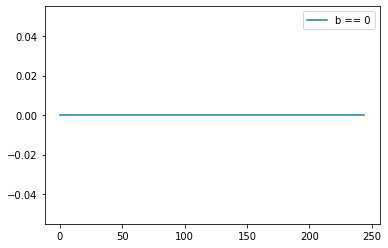

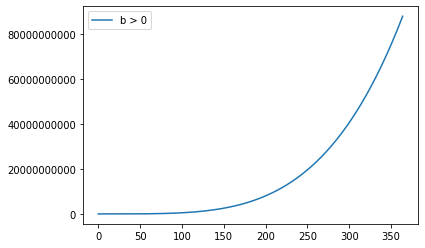

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


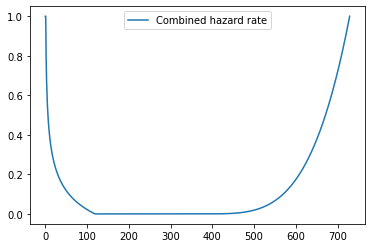

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

left_beta = 0.8
right_beta = 5          

# life span of two years = 120 + 245 + 365

early_life_days = 120
useful_life_days = 245
wearout_life_days = 365

max_early_life_failure_rate = 0.2
max_useful_life_failure_rate = 0.01
max_wearout_life_failure_rate = 0.4

x_early_life = np.arange(early_life_days, dtype=float)
x_useful_life = np.arange(useful_life_days, dtype=float)
x_wearout_life = np.arange(wearout_life_days, dtype=float)

# formula extracted from https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm
# Heckert, N. A., & Filliben, J. J. (2003). NIST/SEMATECH e-Handbook of Statistical Methods; Chapter 1: Exploratory Data Analysis.

def weibull_hazard(x, b): 

    vector = b*(x**(b-1))
    vector[vector == float('inf')] = b
    vector[np.isnan(vector)] = 0
    return vector

def scale_min_max(vector):
    minimum = min(vector)
    maximum = max(vector)
    if (maximum - minimum) == 0:
        return vector        
    vector = (vector - minimum)/(maximum - minimum)
    return vector

                    
plt.plot(weibull_hazard(x_early_life, left_beta), label='b < 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_useful_life, 0), label='b == 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_wearout_life, right_beta), label='b > 0')
plt.ticklabel_format(style='plain')    
plt.legend()
plt.show()

bathtub = np.concatenate((scale_min_max(weibull_hazard(x_early_life, left_beta)), 
                         scale_min_max(weibull_hazard(x_useful_life, 0)),
                         scale_min_max(weibull_hazard(x_wearout_life, right_beta))))

plt.plot(bathtub, label='Combined hazard rate')
plt.legend()
plt.show()



In [2]:
from random import random

def check_over_for_failure(day,
                           bathtub, 
                           max_early_life_failure_rate,
                           max_useful_life_failure_rate,
                           max_wearout_life_failure_rate,
                           early_life_days,
                           useful_life_days,
                           wearout_life_days):

    if day < early_life_days:
        if random() < (max_early_life_failure_rate * bathtub[day]):
            return 1 # early life failure
    elif day < useful_life_days:
        if random() < max_useful_life_failure_rate:
            return 1 # useful life failure
    else: 
        if day >= bathtub.size: # day >= max_days
            day = bathtub.size - 1
        if random() < (max_wearout_life_failure_rate * bathtub[day]):
            return 1 # wearout life failure
    return 0 # does not fail

pod_failures = np.array([])

failures_over_two_years = []

for day in range(730):
    result = check_over_for_failure(day,
                                    bathtub,
                                    max_early_life_failure_rate,
                                    max_useful_life_failure_rate,
                                    max_wearout_life_failure_rate,
                                    early_life_days,
                                    useful_life_days,
                                    wearout_life_days)
    failures_over_two_years.append(result)
    
print(np.array(failures_over_two_years))



[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Generate synthetic data on failures for building models

In [3]:
num_pods = 8 
pod_size = 10 
num_days = early_life_days + useful_life_days + wearout_life_days
failure_data = np.zeros((num_pods, pod_size, num_days))

# Generates synthetic data about servers' failures for a given number of PODs
for pod in range(num_pods):
  # Generate randomly life progresses of servers between 0 and num_days
  life_progresses = (np.random.random(pod_size) * num_days).astype(int)
  # print(life_progresses)
  # Generates failures for each server based on their life progress
  for server in range(pod_size):
      failures_for_two_years = []
      # Verify whether the server fails for a given day based on its life progress
      for day in range(life_progresses[server], life_progresses[server] + num_days):
        server_failure = check_over_for_failure(day,
                                                bathtub,
                                                max_early_life_failure_rate,
                                                max_useful_life_failure_rate,
                                                max_wearout_life_failure_rate,
                                                early_life_days,
                                                useful_life_days,
                                                wearout_life_days)
        failures_for_two_years.append(server_failure)
      failure_data[pod][server] = np.array(failures_for_two_years)

      

failure_data

array([[[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0.

# Generate synthetic data on failures for building models taking into account server replacement




In [4]:
num_pods = 8 
pod_size = 10 
num_days = (early_life_days + useful_life_days + wearout_life_days) 
failure_data = np.zeros((num_pods, pod_size, num_days))

# Generates synthetic data about servers' failures for a given number of PODs
for pod in range(num_pods):
  # Generate randomly life progresses of servers between 0 and num_days
  life_progresses = (np.random.random(pod_size) * num_days).astype(int)
  # Generates failures for each server based on their life progress
  for server in range(pod_size):
      servers_failures = []
      # Verify whether the server fails for a given day based on its life progress
      for day in range(life_progresses[server], life_progresses[server] + num_days):
        server_failure = check_over_for_failure(day % num_days,
                                                bathtub,
                                                max_early_life_failure_rate,
                                                max_useful_life_failure_rate,
                                                max_wearout_life_failure_rate,
                                                early_life_days,
                                                useful_life_days,
                                                wearout_life_days)
        servers_failures.append(server_failure)
      failure_data[pod][server] = np.array(servers_failures)

failure_data

array([[[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

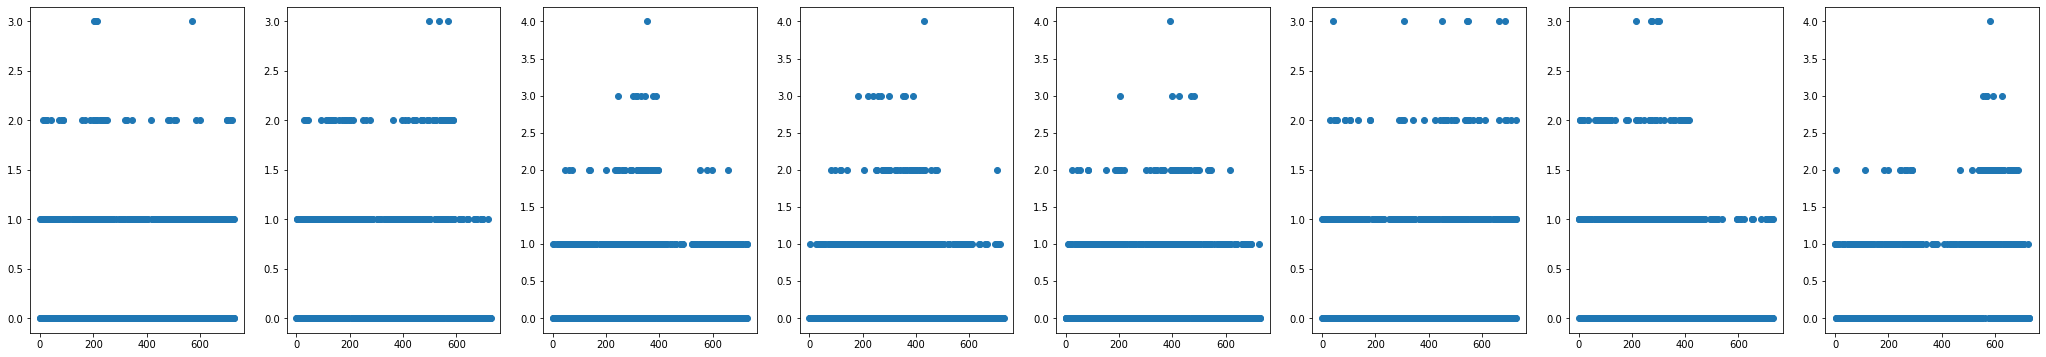

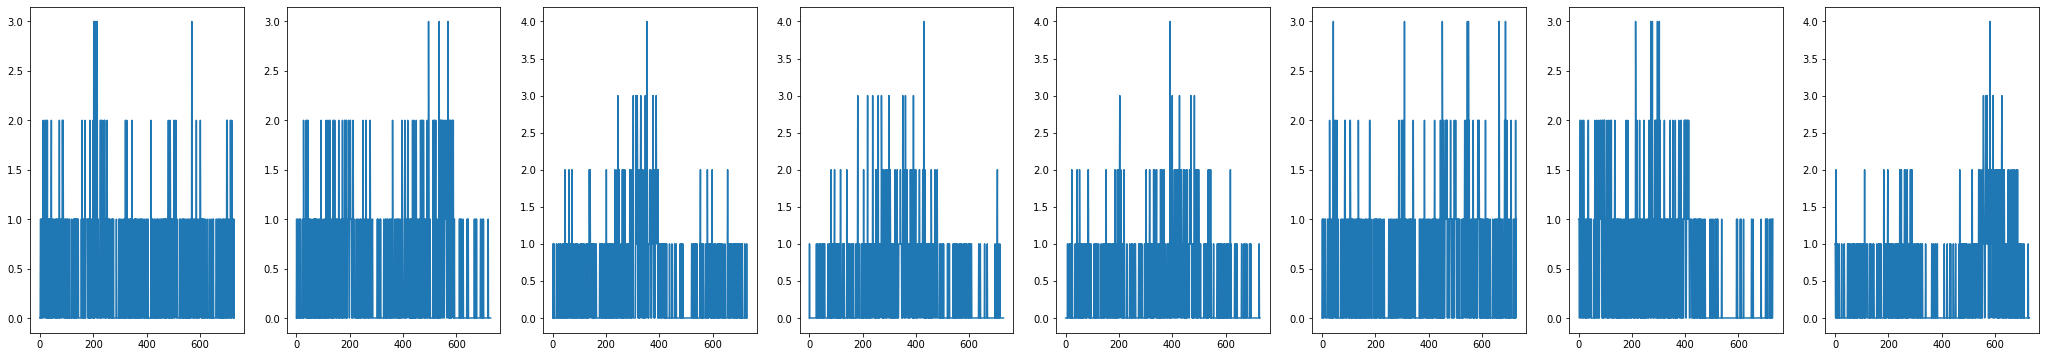

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.scatter(range(failure_data.shape[2]), np.sum(failure_data[i], axis=0))
plt.show()

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.plot(np.sum(failure_data[i], axis=0))
plt.show()

# Simple Exponential Smoothing 

Simple Exponential Smoothing is used for time series prediction when the data particularly does not follow any:

- Trend: An upward or downward slope
- Seasonality: Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.

References 

* Hewamalage, H., Bergmeir, C., & Bandara, K. (2021). Recurrent neural networks for time series forecasting: Current status and future directions. International Journal of Forecasting, 37(1), 388-427.

* Hands-On Guide to Time Series Analysis using Simple Exponential Smoothing in Python. Available at:
https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/#:~:text=Simple%20Exponential%20Smoothing%20(SES)%20is,statsmodel%20using%20pip%20install%20statsmodel.&text=Simple%20Exponential%20Smoothing%20is%20defined,where%20we%20will%20import%20it.



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


276.35421803113906 728    0.542349
729    0.566324
730    0.536655
731    0.536655
732    0.536655
733    0.536655
dtype: float64 0.5366554892308554


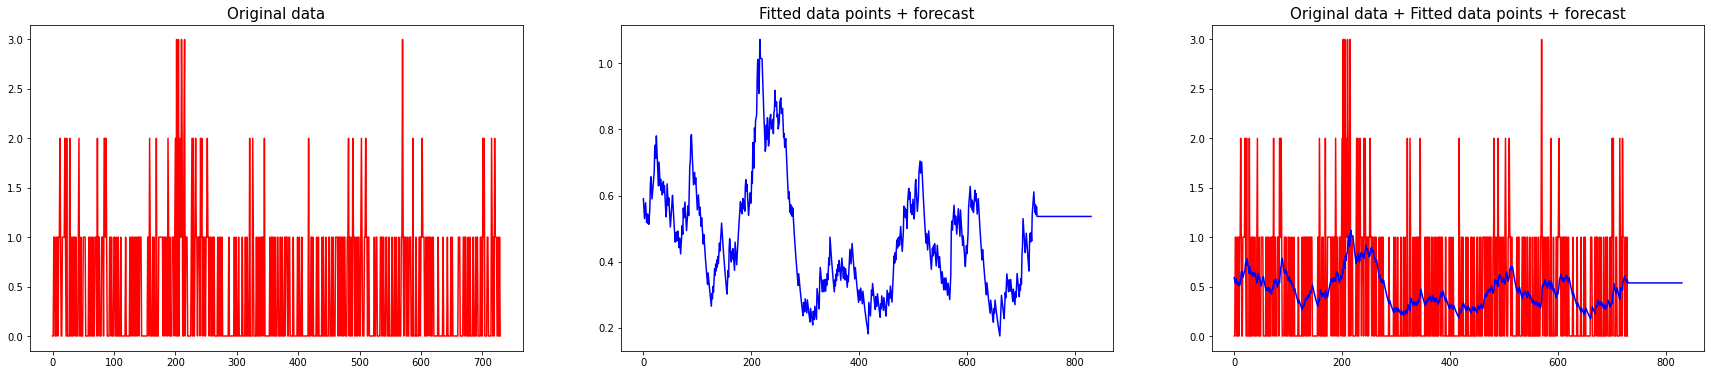

291.5909400450131 728    0.080679
729    0.075305
730    0.070289
731    0.070289
732    0.070289
733    0.070289
dtype: float64 0.07028877551108247


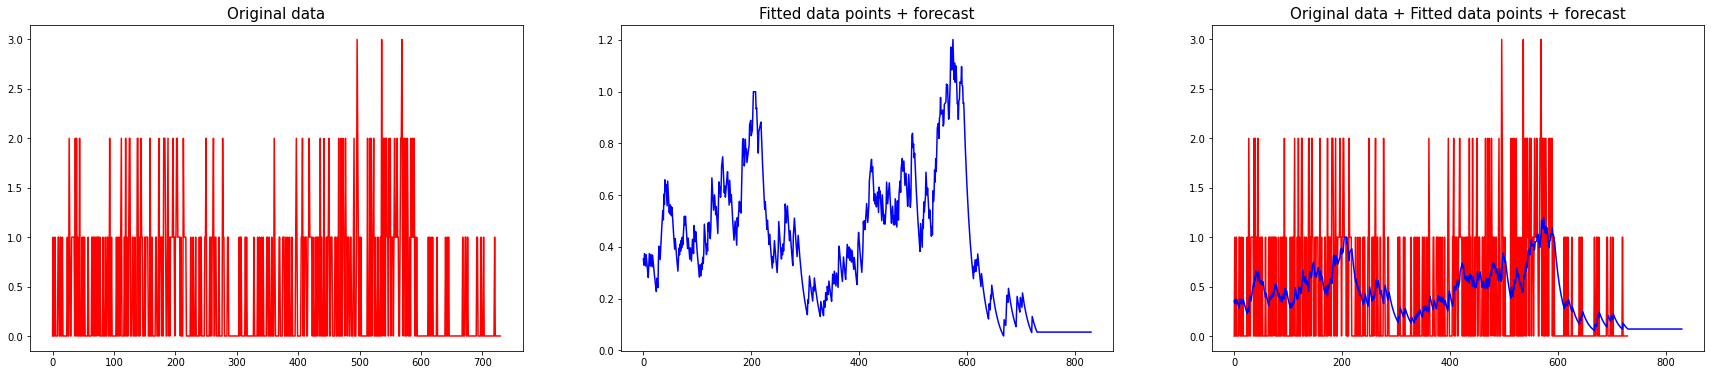

293.467880005904 728    0.270910
729    0.318095
730    0.297509
731    0.297509
732    0.297509
733    0.297509
dtype: float64 0.2975085087849832


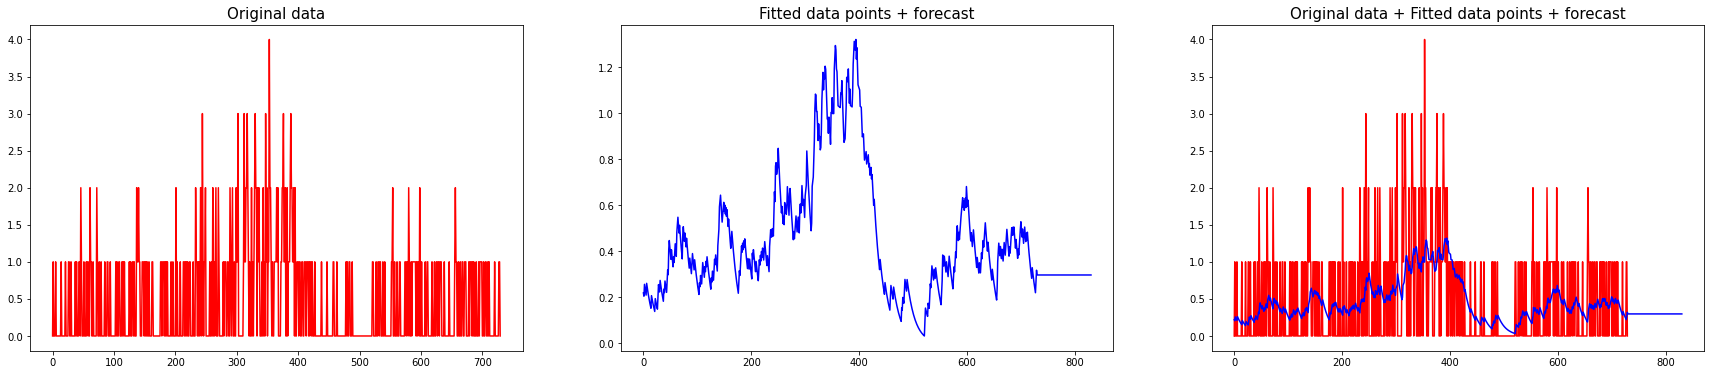

284.4885217632553 728    0.129703
729    0.123923
730    0.118401
731    0.118401
732    0.118401
733    0.118401
dtype: float64 0.11840065015938948


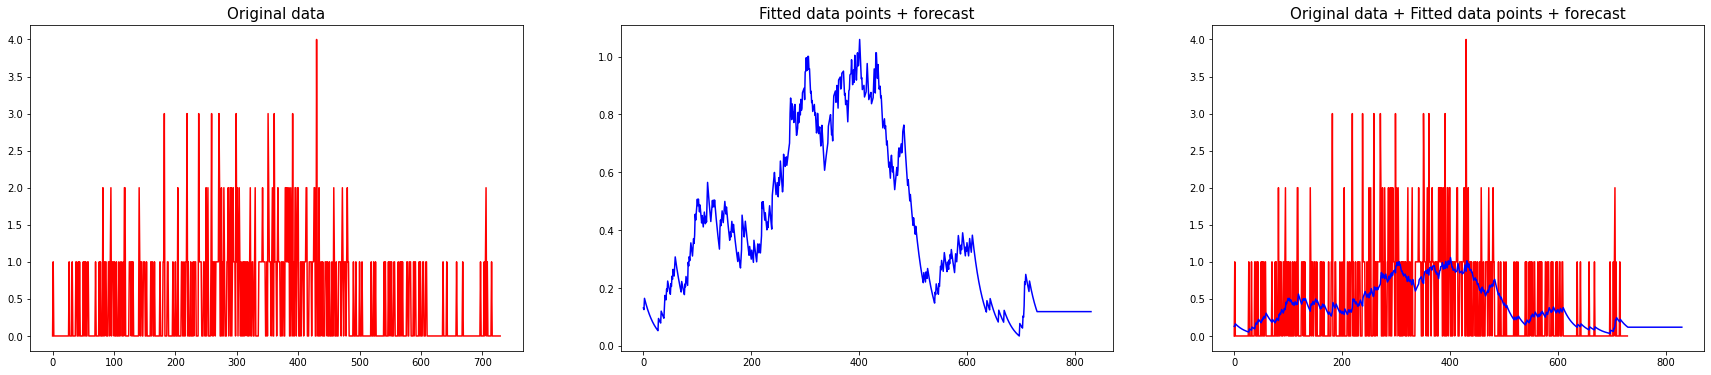

290.3417952231172 728    0.093122
729    0.087872
730    0.082918
731    0.082918
732    0.082918
733    0.082918
dtype: float64 0.08291836078289688


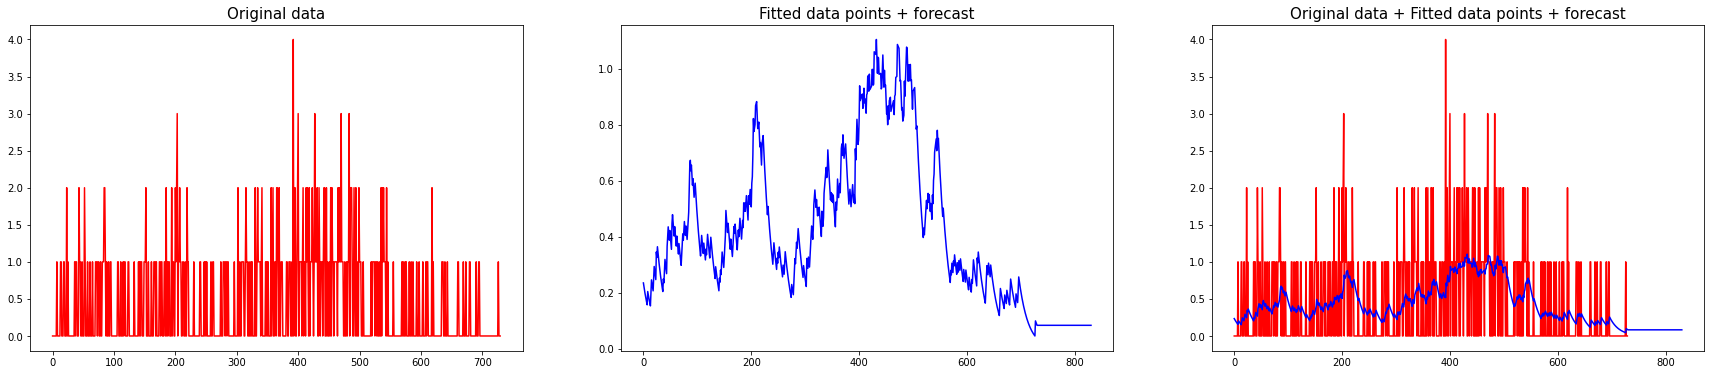

305.7287580449144 728    0.388045
729    0.416614
730    0.443848
731    0.443848
732    0.443848
733    0.443848
dtype: float64 0.44384843820276887


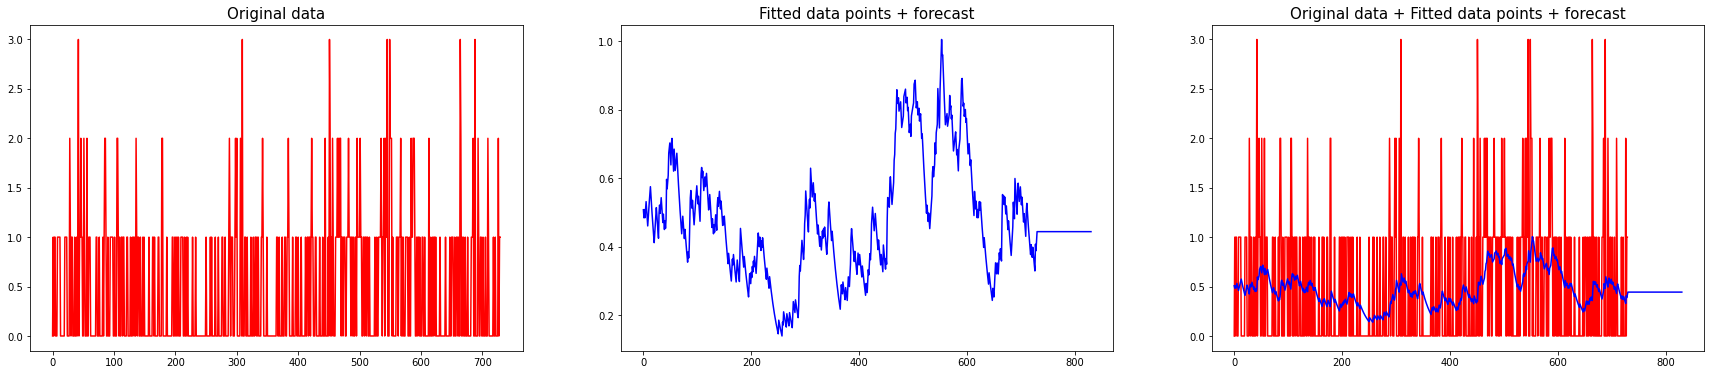

259.33969810843774 728    0.202327
729    0.189617
730    0.240523
731    0.240523
732    0.240523
733    0.240523
dtype: float64 0.2405234893330688


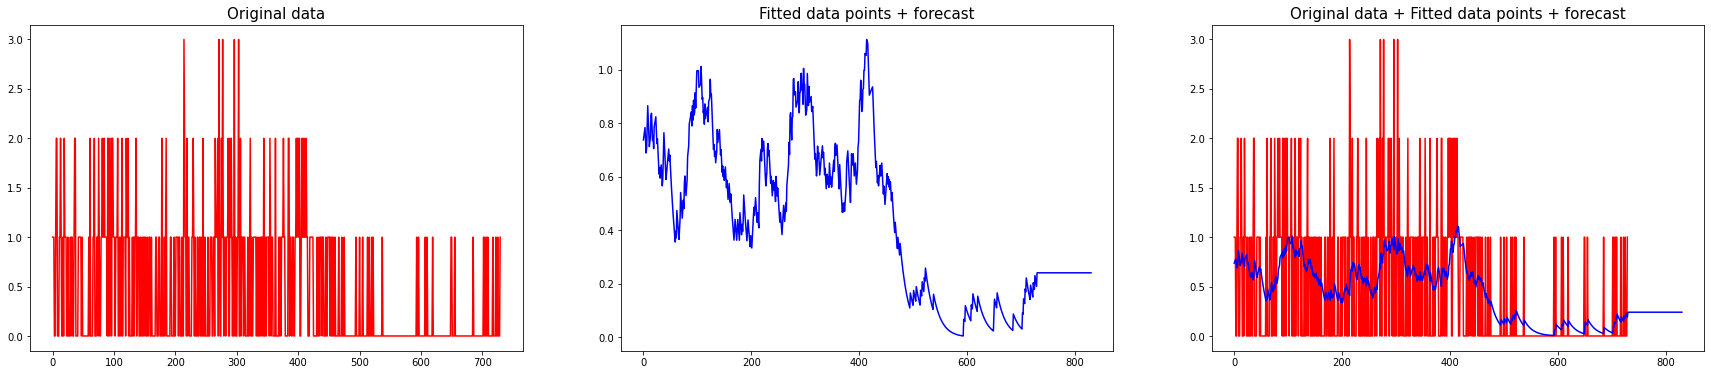

271.8528175692731 728    0.178517
729    0.165659
730    0.153726
731    0.153726
732    0.153726
733    0.153726
dtype: float64 0.15372624102043084


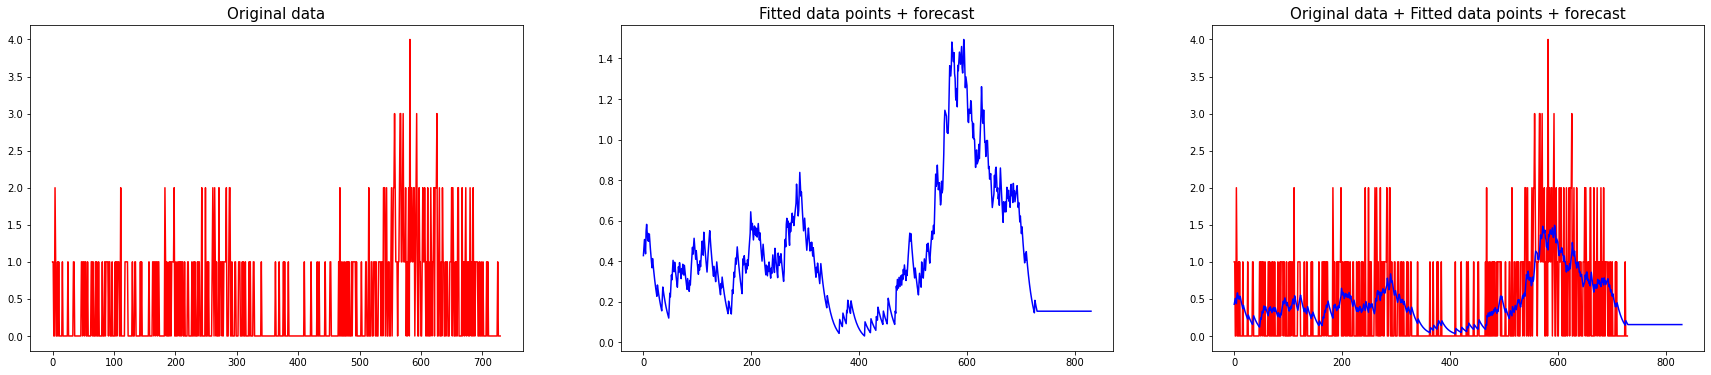

In [6]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd

#for each pod
for i in range(failure_data.shape[0]):
  fig = plt.figure(figsize=(30, 6))

  steps_to_forecast = 100

  data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

  optimized_model = SimpleExpSmoothing(data).fit()
  optimized_forecast = optimized_model.forecast(steps_to_forecast)
  print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])

  ax = fig.add_subplot(1, 3, 1)
  ax.set_title("Original data", fontsize=15)
  ax.plot(data, color="red") 

  ax = fig.add_subplot(1, 3, 2)
  ax.set_title("Fitted data points + forecast", fontsize=15)
  no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                                optimized_forecast.array.reshape(1, -1)))
  ax.plot(no_weight_history.reshape(-1,), color='blue') 

  ax = fig.add_subplot(1, 3, 3)
  ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
  ax.plot(data, color="red") 
  ax.plot(no_weight_history.reshape(-1,), color="blue") 

  plt.show()

# Exponential smoothing - Holt’s Method

Reference
 
https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#Holt%E2%80%99s-Method


276.354218031735 728    0.542349
729    0.566325
730    0.536656
731    0.536656
732    0.536656
733    0.536656
dtype: float64 0.5366558321615439


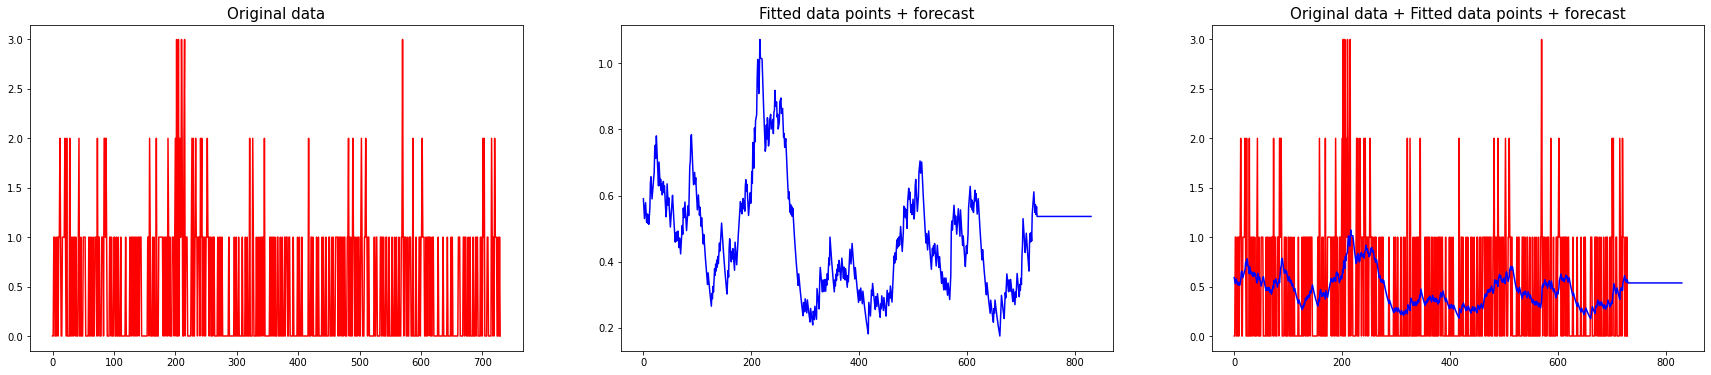

291.5909400450134 728    0.080679
729    0.075305
730    0.070289
731    0.070289
732    0.070289
733    0.070289
dtype: float64 0.07028877496259604


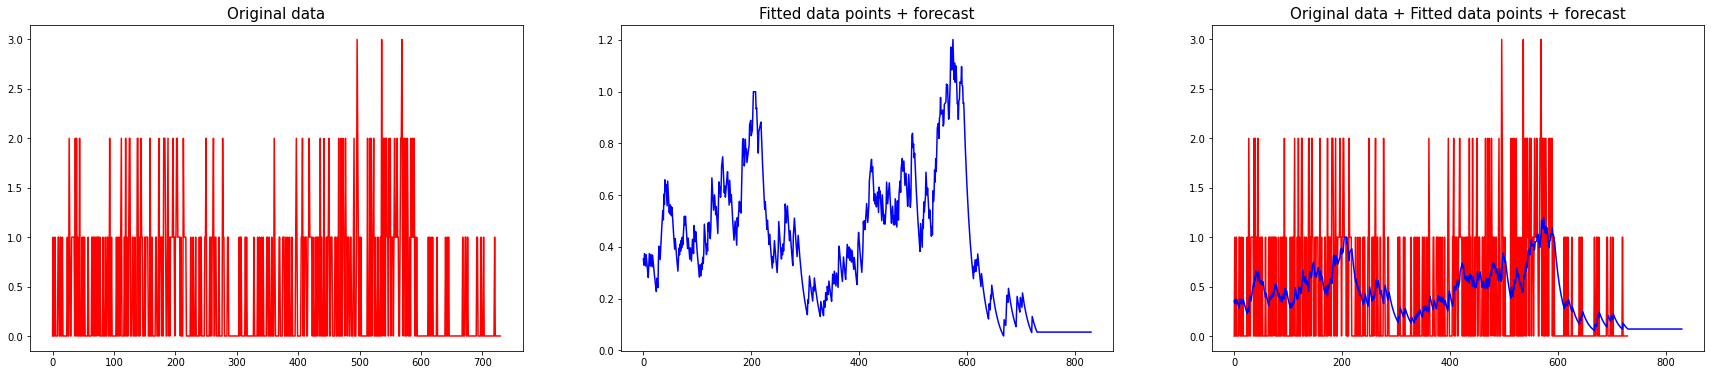

293.4658110480142 728    0.272651
729    0.319817
730    0.299237
731    0.299348
732    0.299459
733    0.299570
dtype: float64 0.29923749052323523


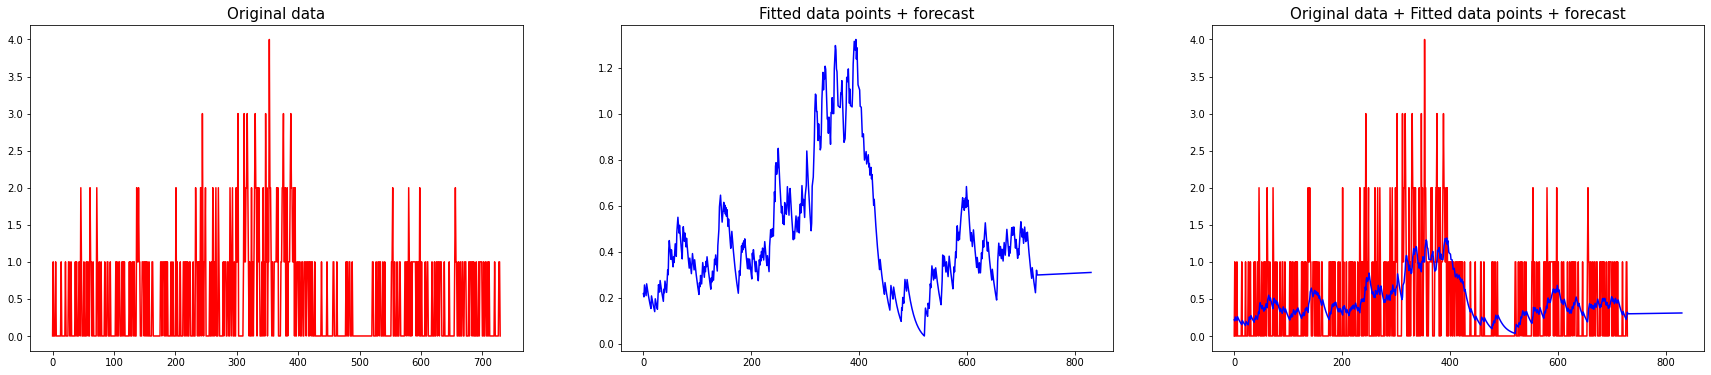

284.48852176336703 728    0.129703
729    0.123923
730    0.118401
731    0.118401
732    0.118401
733    0.118401
dtype: float64 0.11840058179108724


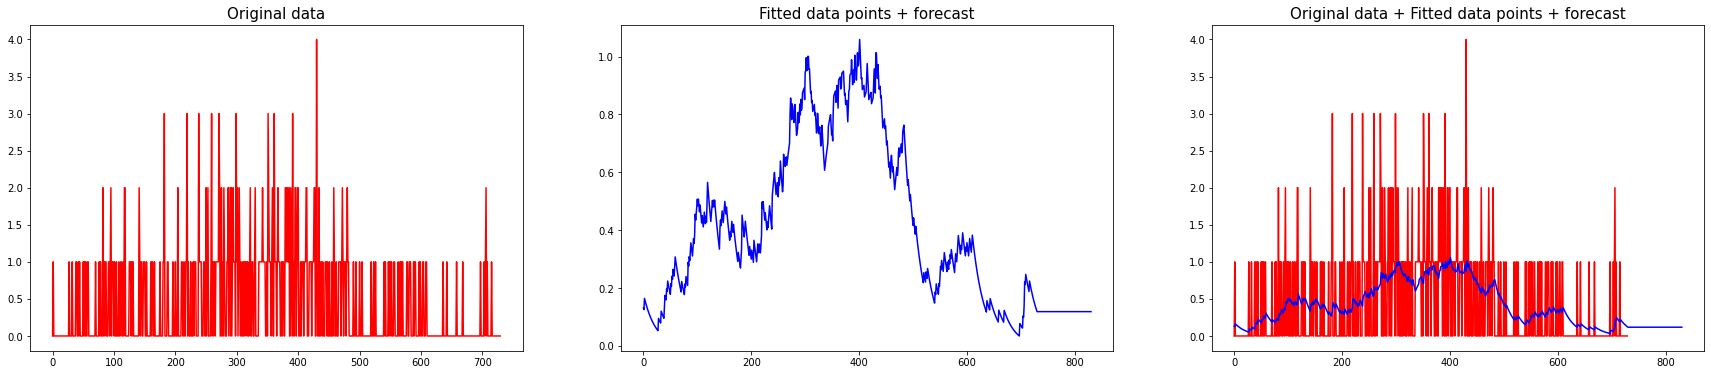

290.34179522308483 728    0.093122
729    0.087872
730    0.082918
731    0.082918
732    0.082918
733    0.082918
dtype: float64 0.08291836741386387


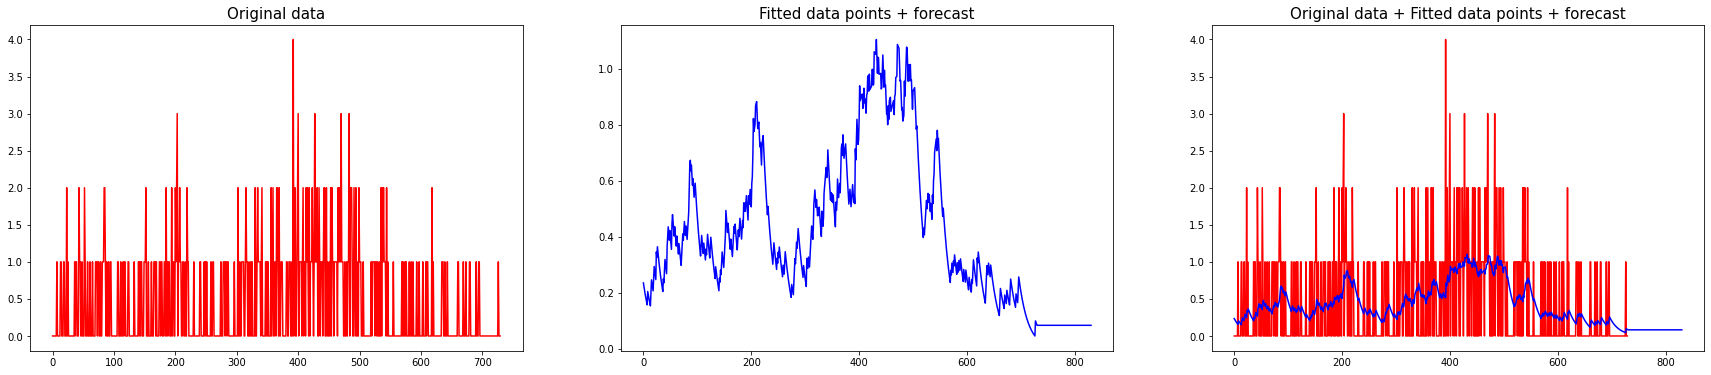

321.67520902438116 728    0.408830
729    0.483471
730    0.549440
731    0.554397
732    0.559355
733    0.564312
dtype: float64 0.549439838096203


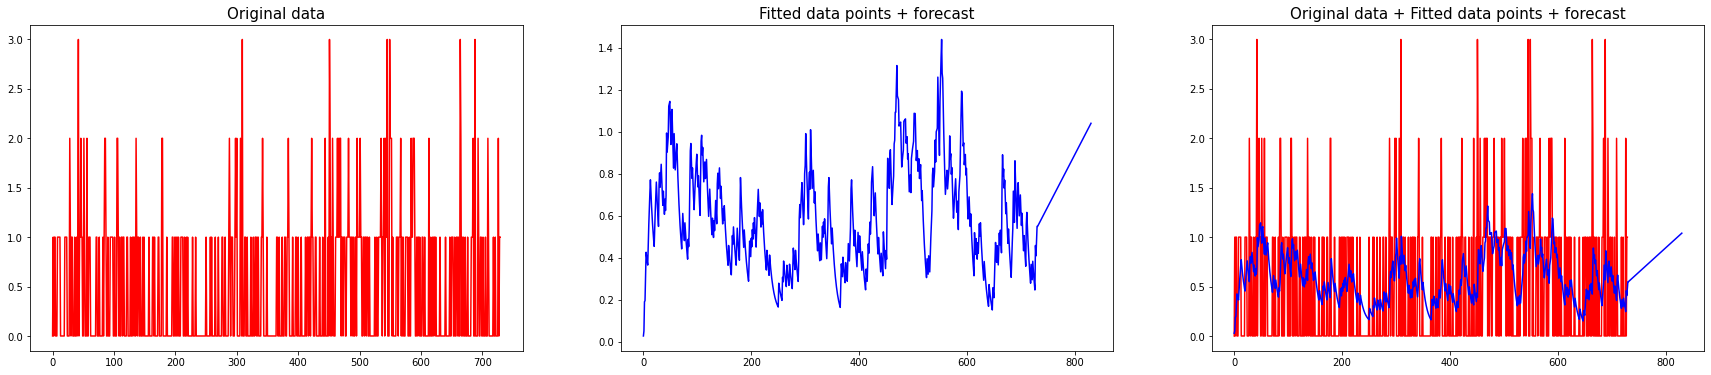

259.33969810844616 728    0.202327
729    0.189617
730    0.240524
731    0.240524
732    0.240524
733    0.240524
dtype: float64 0.2405236014683214


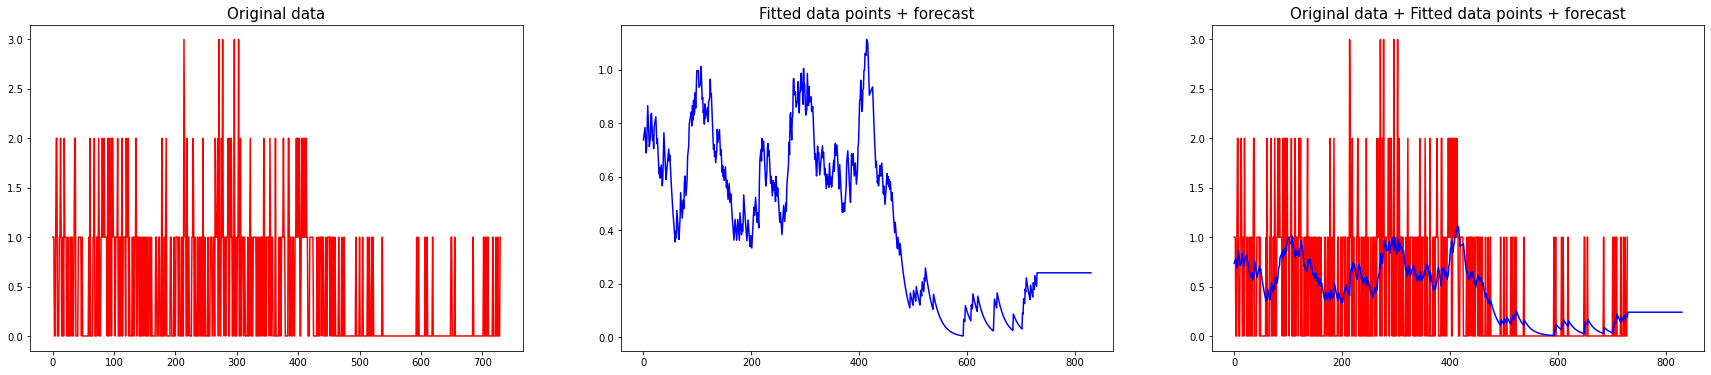

271.85281756927577 728    0.178517
729    0.165659
730    0.153726
731    0.153726
732    0.153726
733    0.153726
dtype: float64 0.15372629685954395


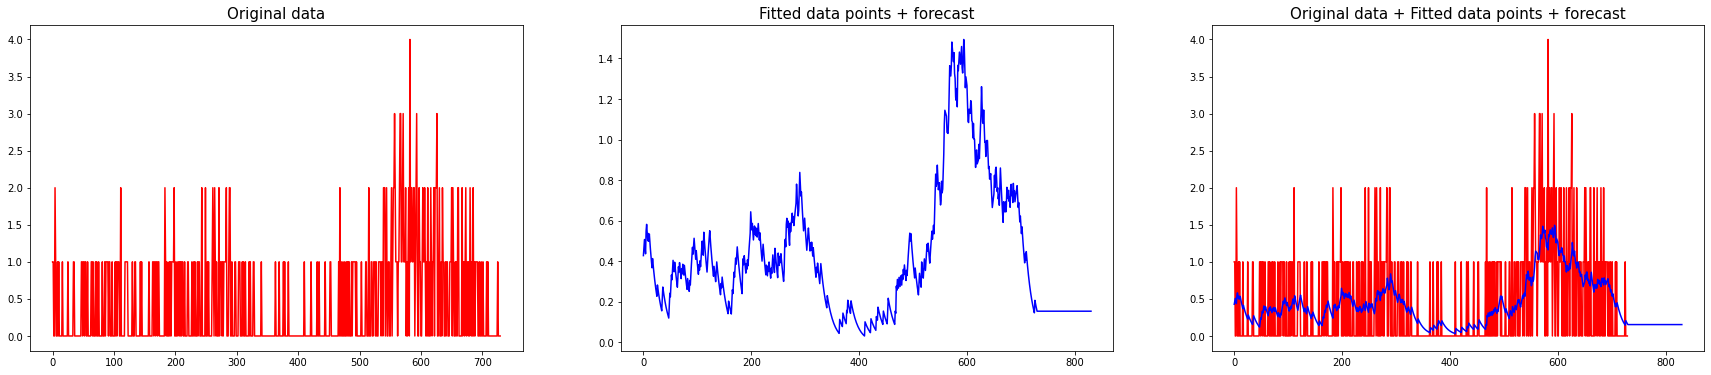

In [7]:
from statsmodels.tsa.api import Holt
import pandas as pd

#for each pod
for i in range(failure_data.shape[0]):

  fig = plt.figure(figsize=(30, 6))

  steps_to_forecast = 100

  data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

  #optimized_model = Holt(data, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
  optimized_model = Holt(data).fit(optimized=True)
  optimized_forecast = optimized_model.forecast(steps_to_forecast)
  print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])


  ax = fig.add_subplot(1, 3, 1)
  ax.set_title("Original data", fontsize=15)
  ax.plot(data, color="red") 

  ax = fig.add_subplot(1, 3, 2)
  ax.set_title("Fitted data points + forecast", fontsize=15)
  no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                                optimized_forecast.array.reshape(1, -1)))
  ax.plot(no_weight_history.reshape(-1,), color='blue') 

  ax = fig.add_subplot(1, 3, 3)
  ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
  ax.plot(data, color="red") 
  ax.plot(no_weight_history.reshape(-1,), color="blue") 

  plt.show()